<a href="https://colab.research.google.com/github/segravjf/python_practice/blob/main/chipotle_top_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chipotle total revenue per item



Suppose you are given a data set of Chipotle orders. Using these data, can you make a plot showing total revenue per menu item? The solution will be written in Python code, walking through the logic/calculation.


Note, you'll probably want to classify the menu items into categories, or you'll have a very long list.

In [30]:
## Import modules
import numpy as np
import pandas as pd

In [8]:
## Import dataset
df = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [29]:
## Let's work on a classification system to group up items
## First, let's look at all of the items that we can reasonably  and sum up sales
df['item_price_formatted'] = df['item_price'].replace("[$,]", "", regex=True).astype(float)
df['total_spend'] = df.quantity * df.item_price_formatted
top_items = df[['item_name','total_spend']].groupby(['item_name']).sum()

top_items.sort_values(by=['total_spend'], ascending = False).head(50)

,total_spend
item_name,
Chicken Bowl,8044.63
Chicken Burrito,6387.06
Steak Burrito,4236.13
Steak Bowl,2479.81
Chips and Guacamole,2475.62
Chicken Salad Bowl,1506.25
Chicken Soft Tacos,1199.01
Chips and Fresh Tomato Salsa,1033.96
Veggie Burrito,1002.27


In [48]:
## Create a category flag
cond1 = df['item_name'].str.contains('Bowl', regex=False) # Bowls
cond2 = df['item_name'].str.contains('Burrito', regex=False) # Burritos
cond3 = df['item_name'].str.contains('Tacos', regex=False) # Tacos
cond4 = df['item_name'].str.contains('Chips', regex=False) # Sides
cond5 = df['item_name'].str.contains('Salad', regex=False) # Salads
## Everything else is likely a beverage
df['item_category'] = np.select(
    [cond1,cond2,cond3,cond4,cond5],
    ['Bowls','Burritos','Tacos','Sides','Salads'],
    default = 'Beverages'
)

top_cats = df[['item_category','total_spend']].groupby(['item_category']).sum()

top_cats.sort_values(by='total_spend', ascending = False)

,total_spend
item_category,
Bowls,15256.10
Burritos,13180.94
Sides,4985.86
Tacos,3628.27
Beverages,1994.37
Salads,191.48


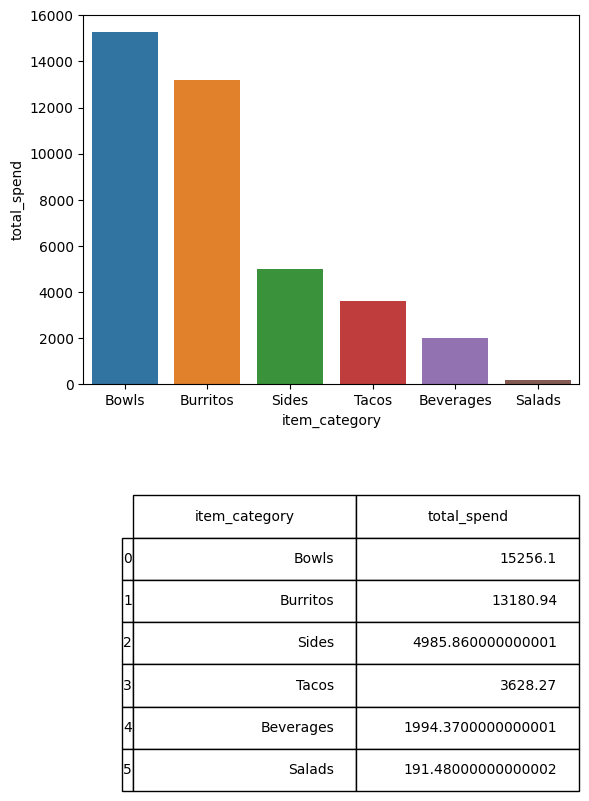

In [49]:
## Plot in seaborn
import seaborn as sns
import matplotlib.pyplot as plt

top_cats = top_cats.sort_values(by='total_spend',ascending = False).reset_index()
sns.barplot(data=top_cats, x='item_category',y='total_spend')

## Add a table below the column chart
table = plt.table(cellText = top_cats.values,
                  rowLabels=top_cats.index,
                  colLabels=top_cats.columns,
                  bbox=(0.1,-1.1,0.9,0.8))

plt.show()